In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
daily = pd.read_csv("restrictions_daily.csv")
weekly = pd.read_csv("restrictions_weekly.csv")
summary = pd.read_csv("restrictions_summary.csv")

In [12]:
daily.columns

Index(['date', 'schools_closed', 'pubs_closed', 'shops_closed',
       'eating_places_closed', 'stay_at_home',
       'household_mixing_indoors_banned', 'wfh', 'rule_of_6_indoors', 'curfew',
       'eat_out_to_help_out'],
      dtype='object')

In [9]:
weekly.columns

Index(['week_start', 'schools_closed', 'pubs_closed', 'shops_closed',
       'eating_places_closed', 'stay_at_home',
       'household_mixing_indoors_banned', 'wfh', 'rule_of_6_indoors', 'curfew',
       'eat_out_to_help_out'],
      dtype='object')

In [10]:
summary.columns

Index(['date', 'restriction', 'source', 'schools_closed', 'pubs_closed',
       'shops_closed', 'eating_places_closed', 'stay_at_home',
       'household_mixing_indoors_banned', 'wfh', 'rule_of_6_indoors', 'curfew',
       'eat_out_to_help_out'],
      dtype='object')

In [5]:
daily.head()

,date,schools_closed,pubs_closed,shops_closed,eating_places_closed,stay_at_home,household_mixing_indoors_banned,wfh,rule_of_6_indoors,curfew,eat_out_to_help_out
0,2020-03-01,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,0,0,0,0,0,0,0,0
2,2020-03-03,0,0,0,0,0,0,0,0,0,0
3,2020-03-04,0,0,0,0,0,0,0,0,0,0
4,2020-03-05,0,0,0,0,0,0,0,0,0,0


In [4]:
daily.shape

(1416, 11)

In [5]:
def get_closed_stats(df, time_unit):
    schools_closed = df['schools_closed'].tolist()
    pubs_closed = df['pubs_closed'].tolist()
    shops_closed = df['shops_closed'].tolist()
    eating_closed = df['eating_places_closed'].tolist()
    time = df[time_unit]

    all_closed = sum(1 for a, b, c, d in zip(schools_closed, pubs_closed, shops_closed, eating_closed) if a == b == c == d == 1)
    return time, schools_closed.count(1), shops_closed.count(1), eating_closed.count(1), all_closed

In [6]:
days, num_schools_daily, num_shops_daily, num_eating_daily, num_all_daily = get_closed_stats(daily, 'date')
weeks, num_schools_weekly, num_shops_weekly, num_eating_weekly, num_all_weekly = get_closed_stats(weekly, 'week_start')

In [9]:
num_schools_daily

132

In [10]:
num_all_daily

131

In [11]:
num_all_weekly

19

In [19]:
daily['wfh'][5]

np.int64(0)

In [20]:
def plot_days(df):
    # Ensure that the 'date' column is in datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Set 'date' column as index for better plotting
    df.set_index('date', inplace=True)

    # Plot the business closed days
    plt.figure(figsize=(10, 6))
    for col in df.columns:
        plt.plot(df.index, df[col], label=col)

    # Set plot labels and title
    plt.xlabel('Date')
    plt.ylabel('Closed (1 = Closed, 0 = Open)')
    plt.title('Business Closure Over Time')
    plt.legend(loc='upper right')
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

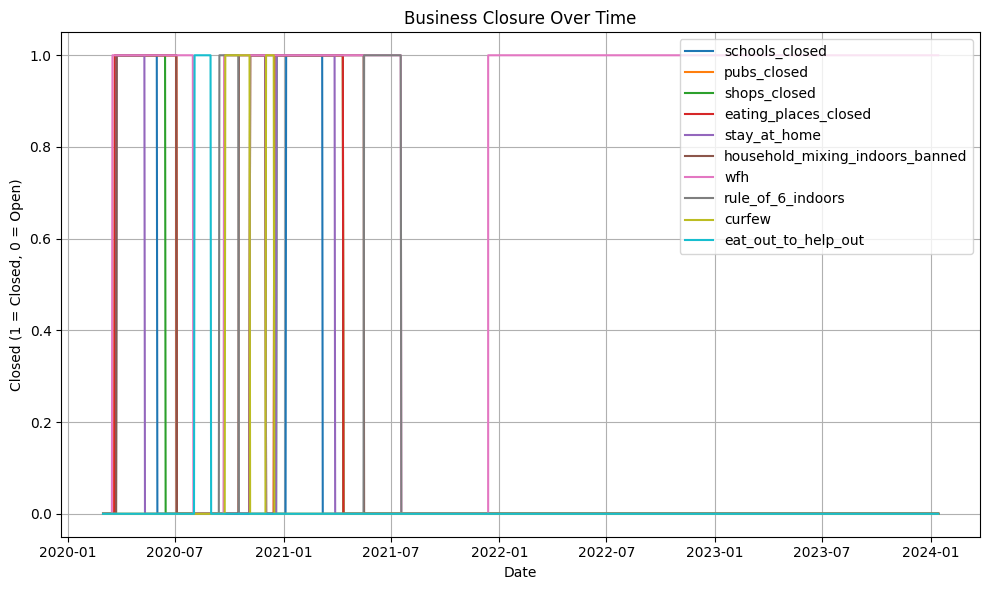

In [21]:
plot_days(daily)